### Import

In [229]:
import matplotlib.pyplot as plt
import metaSIR as mSIR
import seaborn as sns
import pandas as pd
import pickle as pk
import numpy as np
sns.set_style('darkgrid')

### Loading data - 1st:

In [230]:
with open('with_without_trajectories.pkl', 'rb') as file:
    trajectories = pk.load(file)

In [231]:
S = trajectories['with_net'][:, : 303]
I = trajectories['with_net'][:, 303 : 606]  
R = trajectories['with_net'][:, 606 : ]  

matriz_agregada = np.hstack(
    (
        S.sum(axis=1, keepdims=True), 
        I.sum(axis=1, keepdims=True), 
        R.sum(axis=1, keepdims=True))
    )

matriz_ordinaria = trajectories['without_net']

### Loading data - 2st:

In [232]:
with open('trajectories.pkl', 'rb') as file:
    subtrajectories = pk.load(file)

In [233]:
S = subtrajectories['baseline'][:, : 303]
I = subtrajectories['baseline'][:, 303 : 606]  
R = subtrajectories['baseline'][:, 606 : ]  

matriz_agregada_china = np.hstack(
    (
        S.sum(axis=1, keepdims=True), 
        I.sum(axis=1, keepdims=True), 
        R.sum(axis=1, keepdims=True))
    )

In [234]:
df_with_net = pd.DataFrame(matriz_agregada)
df_with_net.columns = ['S', 'I', 'R']
df_with_net


,S,I,R
0,121200.000000,30300.000000,0.000000
1,121015.509680,30423.756479,60.733842
2,120830.549242,30547.735298,121.715460
3,120645.120363,30671.934339,182.945298
4,120459.224744,30796.351462,244.423794
...,...,...,...
5995,2917.464933,3.813557,148578.721510
5996,2917.464375,3.806493,148578.729132
5997,2917.463818,3.799443,148578.736739
5998,2917.463263,3.792405,148578.744332


In [235]:
df_without_net = pd.DataFrame(matriz_ordinaria)
df_without_net.columns = ['S', 'I', 'R']
df_without_net

,S,I,R
0,121200.000000,30300.000000,0.000000
1,121015.509680,30423.756479,60.733842
2,120830.549242,30547.735298,121.715460
3,120645.120363,30671.934339,182.945298
4,120459.224744,30796.351462,244.423794
...,...,...,...
5995,2917.464933,3.813557,148578.721510
5996,2917.464375,3.806493,148578.729132
5997,2917.463818,3.799443,148578.736739
5998,2917.463263,3.792405,148578.744332


In [236]:
df_with_net == df_without_net

,S,I,R
0,True,True,True
1,False,False,False
2,False,False,True
3,False,False,False
4,True,False,False
...,...,...,...
5995,False,False,False
5996,False,False,False
5997,False,False,False
5998,False,False,False


### Ploting trajectories

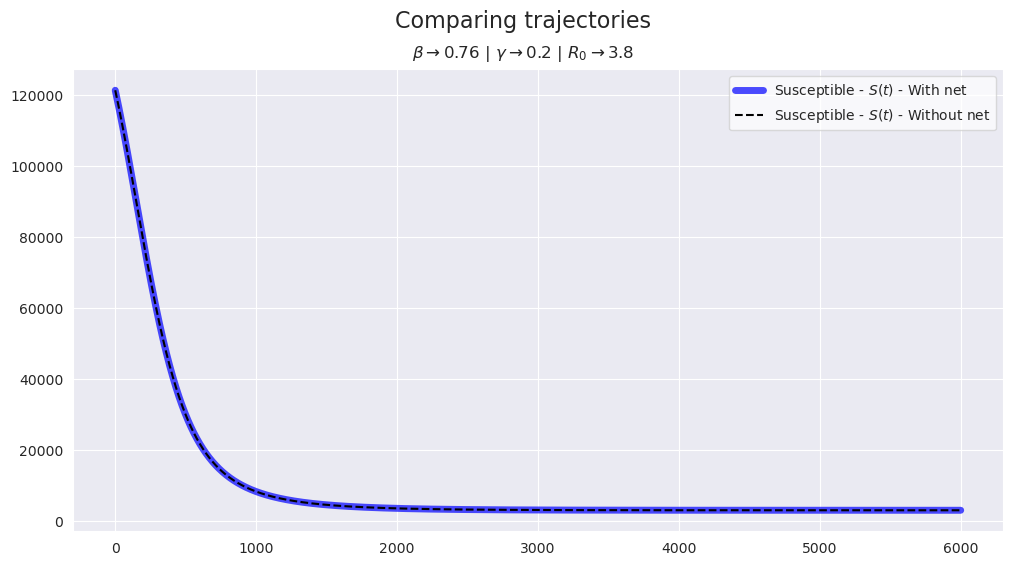

In [237]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(df_with_net['S'], 'blue',  lw=5, alpha=.7, label=r"Susceptible - $S(t)$ - With net")
plt.plot(df_without_net['S'], 'black', markersize=1, alpha=1., linestyle='dashed', label=r"Susceptible - $S(t)$ - Without net")
fig.suptitle('Comparing trajectories', fontsize=16)
subtitle_text = r'$\beta$' + r'$\rightarrow$' + fr"{.76}" + ' | ' + r'$\gamma$' + r'$\rightarrow$' + fr'{.2}' + \
                ' | ' + r'$R_{0}$' + r'$\rightarrow$' + fr'{.76 / .2}'
fig.text(0.5, 0.90, subtitle_text, ha='center', fontsize=12)
legend = ax.legend()
legend.get_frame().set_facecolor('white') 
legend.get_frame().set_alpha(.7)
fig.savefig('S_comparing_with_without_net.pdf')
plt.show()

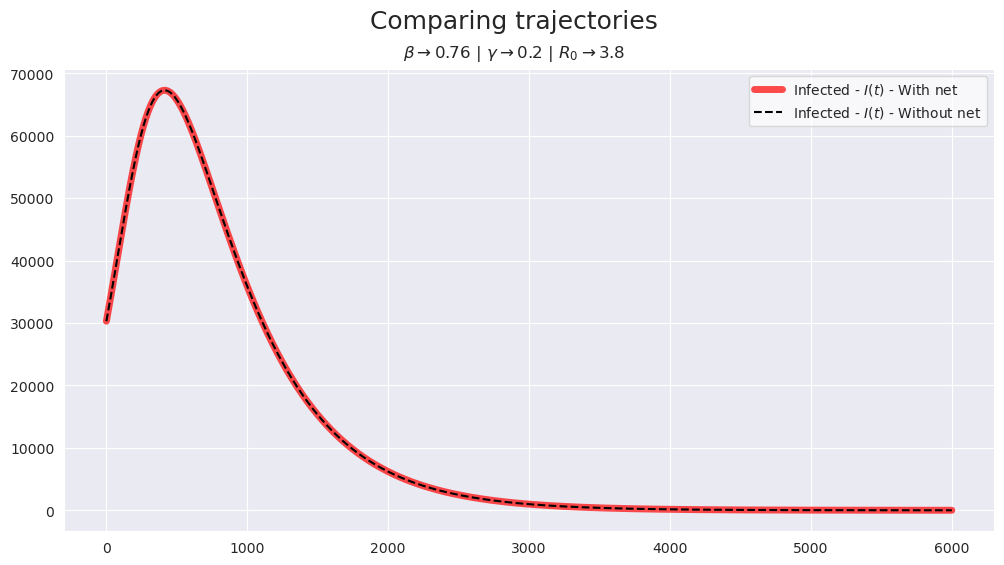

In [238]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(df_with_net['I'], 'red', lw=5, alpha=0.7, label=r"Infected - $I(t)$ - With net")
plt.plot(df_without_net['I'], 'black', markersize=1, alpha=1., linestyle='dashed', label=r"Infected - $I(t)$ - Without net")
fig.suptitle(f'Comparing trajectories', fontsize=18)
subtitle_text = r'$\beta$' + r'$\rightarrow$' + fr"{.76}" + ' | ' + r'$\gamma$' + r'$\rightarrow$' + fr'{.2}' + \
                ' | ' + r'$R_{0}$' + r'$\rightarrow$' + fr'{.76 / .2}'
fig.text(0.5, 0.90, subtitle_text, ha='center', fontsize=12)
legend = ax.legend()
legend.get_frame().set_facecolor('white') 
legend.get_frame().set_alpha(.7)
fig.savefig('I_comparing_with_without_net.pdf')
plt.show()

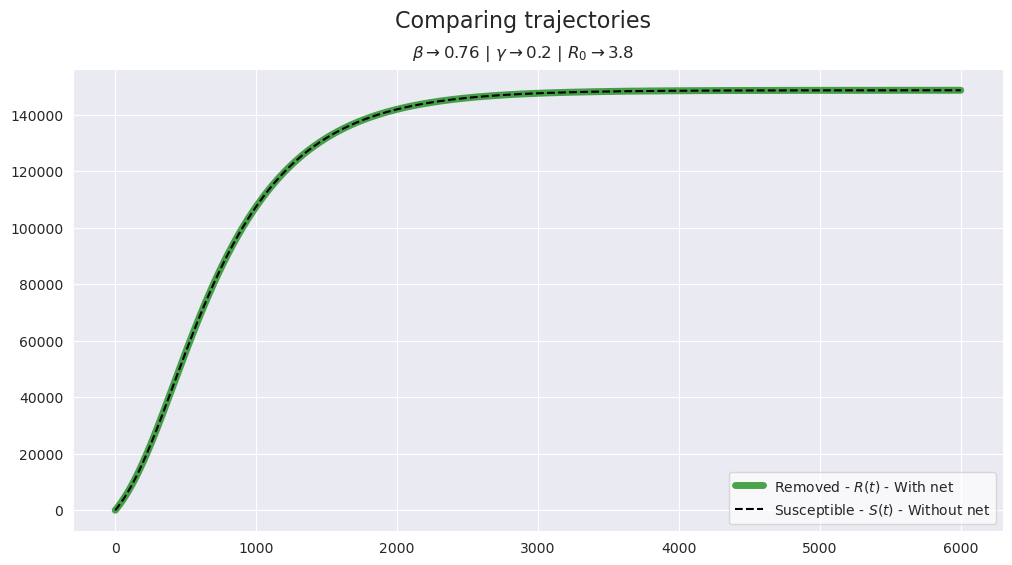

In [239]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(df_with_net['R'], 'green',  lw=5, alpha=.7, label=r"Removed - $R(t)$ - With net")
plt.plot(df_without_net['R'], 'black', markersize=1, alpha=1., linestyle='dashed', label=r"Susceptible - $S(t)$ - Without net")
fig.suptitle('Comparing trajectories', fontsize=16)
subtitle_text = r'$\beta$' + r'$\rightarrow$' + fr"{.76}" + ' | ' + r'$\gamma$' + r'$\rightarrow$' + fr'{.2}' + \
                ' | ' + r'$R_{0}$' + r'$\rightarrow$' + fr'{.76 / .2}'
fig.text(0.5, 0.90, subtitle_text, ha='center', fontsize=12)
legend = ax.legend()
legend.get_frame().set_facecolor('white') 
legend.get_frame().set_alpha(.7)
fig.savefig('R_comparing_with_without_net.pdf')
plt.show()

#### Metapopulation SIR Network with equal weights X Ordinary SIR Model (single subpop - same initial conditions)

In [240]:
print(f'Frobenius norm: {mSIR.frobenius_norm(matriz_agregada, matriz_ordinaria)}')

Frobenius norm: 3.221945275469601e-08


### Baidu Mobility Data

In [241]:
df_baidu_data = pd.DataFrame(matriz_agregada_china)
df_baidu_data.columns = ['S', 'I', 'R']
df_baidu_data

,S,I,R
0,121200.000000,30300.000000,0.000000
1,121015.509680,30423.756479,60.733842
2,120830.549242,30547.735298,121.715460
3,120645.120363,30671.934339,182.945298
4,120459.224744,30796.351462,244.423794
...,...,...,...
5995,2917.464933,3.813557,148578.721510
5996,2917.464375,3.806493,148578.729132
5997,2917.463818,3.799443,148578.736739
5998,2917.463263,3.792405,148578.744332


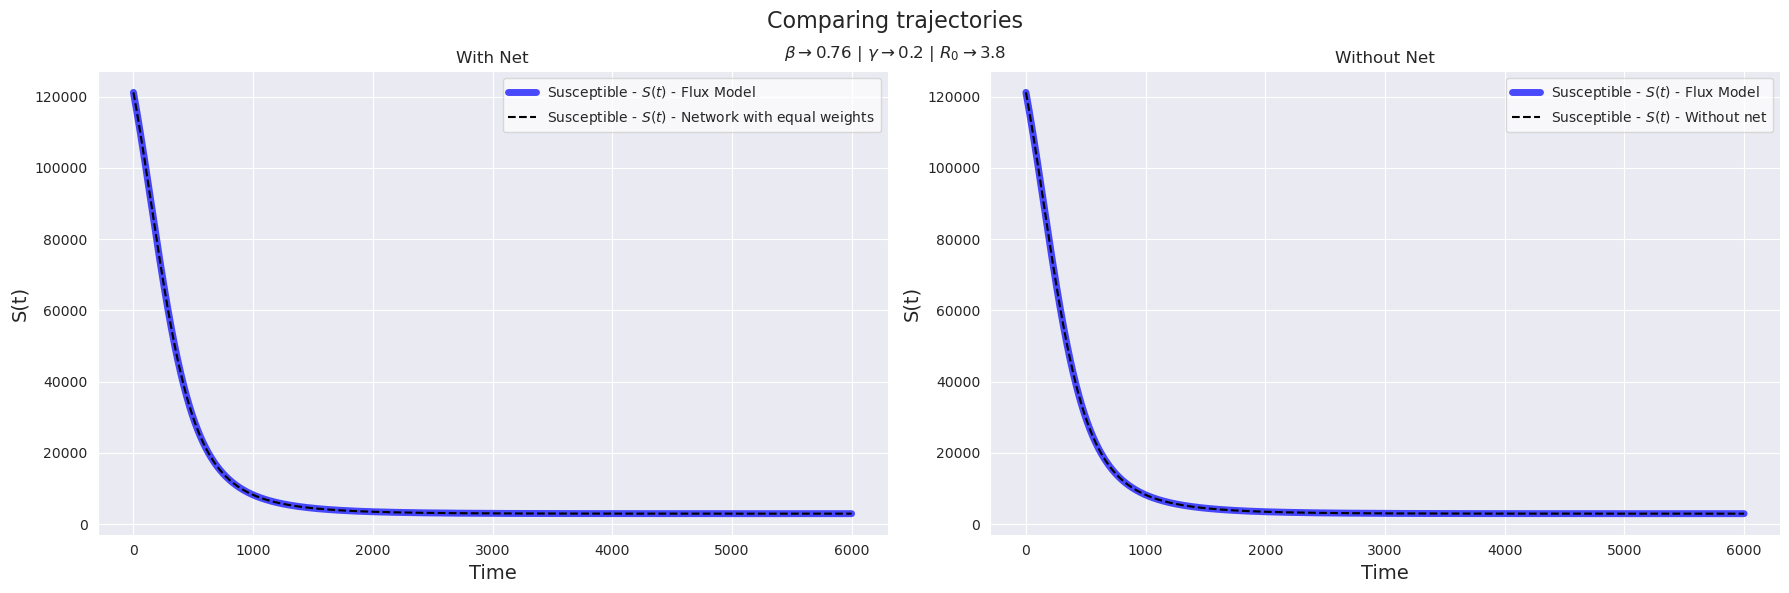

In [242]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Comparing trajectories', fontsize=16)
subtitle_text = r'$\beta$' + r'$\rightarrow$' + fr"{.76}" + ' | ' + r'$\gamma$' + r'$\rightarrow$' + fr'{.2}' + \
                ' | ' + r'$R_{0}$' + r'$\rightarrow$' + fr'{.76 / .2}'
fig.text(0.5, 0.90, subtitle_text, ha='center', fontsize=12)

ax1 = axs[0]
ax1.plot(df_baidu_data['S'], 'blue', lw=5, alpha=0.7, label=r"Susceptible - $S(t)$ - Flux Model")
ax1.plot(df_with_net['S'], 'black', markersize=1, alpha=1.0, linestyle='dashed', label=r"Susceptible - $S(t)$ - Network with equal weights")
ax1.set_title('With Net')
ax1.set_xlabel("Time", fontsize=14)
ax1.set_ylabel(r'S(t)', fontsize=14)
legend1 = ax1.legend()
legend1.get_frame().set_facecolor('white')
legend1.get_frame().set_alpha(0.7)

ax2 = axs[1]
ax2.plot(df_baidu_data['S'], 'blue', lw=5, alpha=0.7, label=r"Susceptible - $S(t)$ - Flux Model")
ax2.plot(df_without_net['S'], 'black', markersize=1, alpha=1.0, linestyle='dashed', label=r"Susceptible - $S(t)$ - Without net")
ax2.set_title('Without Net')
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel(r'S(t)', fontsize=14)
legend2 = ax2.legend()
legend2.get_frame().set_facecolor('white')
legend2.get_frame().set_alpha(0.7)

plt.tight_layout()
fig.savefig('S_comparing_flux_with_without_net.pdf')
plt.show()

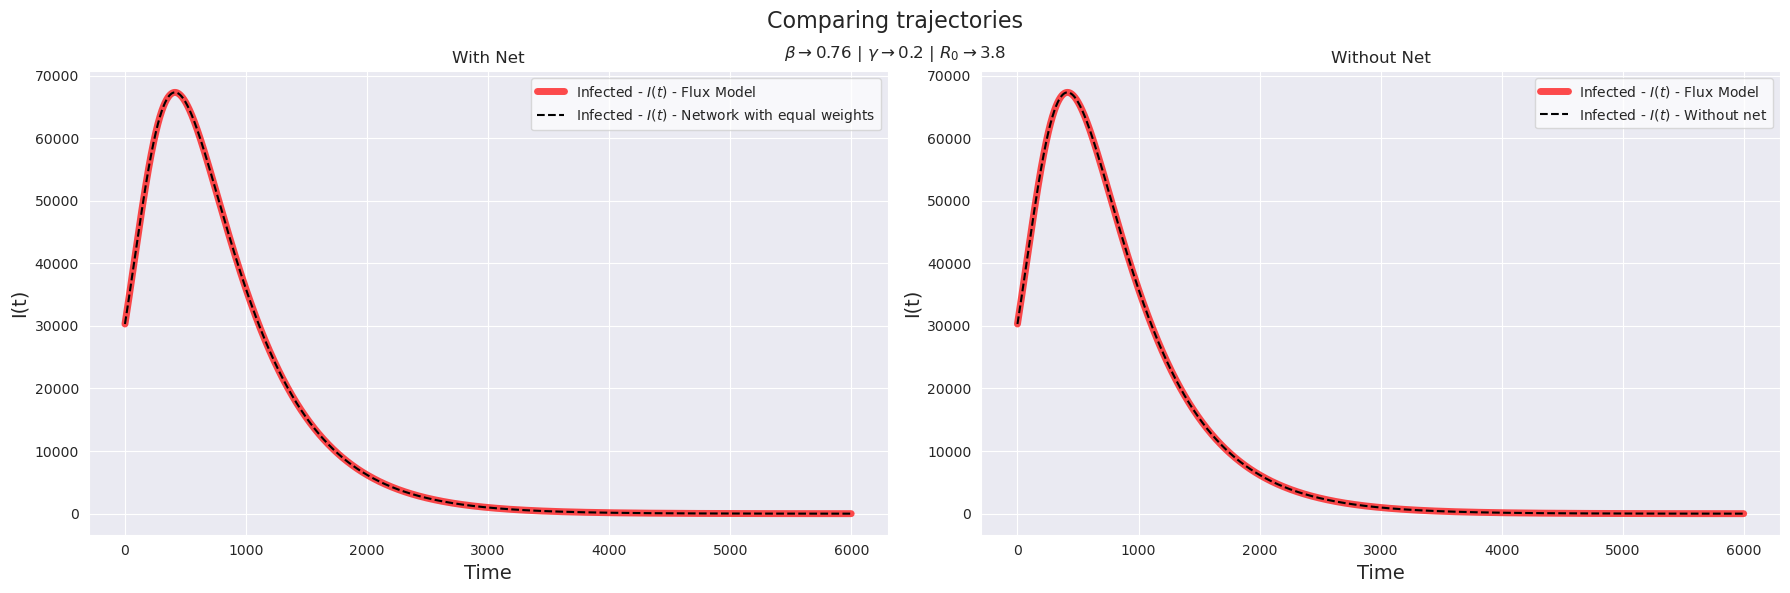

In [243]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Comparing trajectories', fontsize=16)
subtitle_text = r'$\beta$' + r'$\rightarrow$' + fr"{.76}" + ' | ' + r'$\gamma$' + r'$\rightarrow$' + fr'{.2}' + \
                ' | ' + r'$R_{0}$' + r'$\rightarrow$' + fr'{.76 / .2}'
fig.text(0.5, 0.90, subtitle_text, ha='center', fontsize=12)

ax1 = axs[0]
ax1.plot(df_baidu_data['I'], 'red', lw=5, alpha=0.7, label=r"Infected - $I(t)$ - Flux Model")
ax1.plot(df_with_net['I'], 'black', markersize=1, alpha=1.0, linestyle='dashed', label=r"Infected - $I(t)$ - Network with equal weights")
ax1.set_title('With Net')
ax1.set_xlabel("Time", fontsize=14)
ax1.set_ylabel(r'I(t)', fontsize=14)
legend1 = ax1.legend()
legend1.get_frame().set_facecolor('white')
legend1.get_frame().set_alpha(0.7)

ax2 = axs[1]
ax2.plot(df_baidu_data['I'], 'red', lw=5, alpha=0.7, label=r"Infected - $I(t)$ - Flux Model")
ax2.plot(df_without_net['I'], 'black', markersize=1, alpha=1.0, linestyle='dashed', label=r"Infected - $I(t)$ - Without net")
ax2.set_title('Without Net')
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel(r'I(t)', fontsize=14)
legend2 = ax2.legend()
legend2.get_frame().set_facecolor('white')
legend2.get_frame().set_alpha(0.7)

plt.tight_layout()
fig.savefig('I_comparing_flux_with_without_net.pdf')
plt.show()

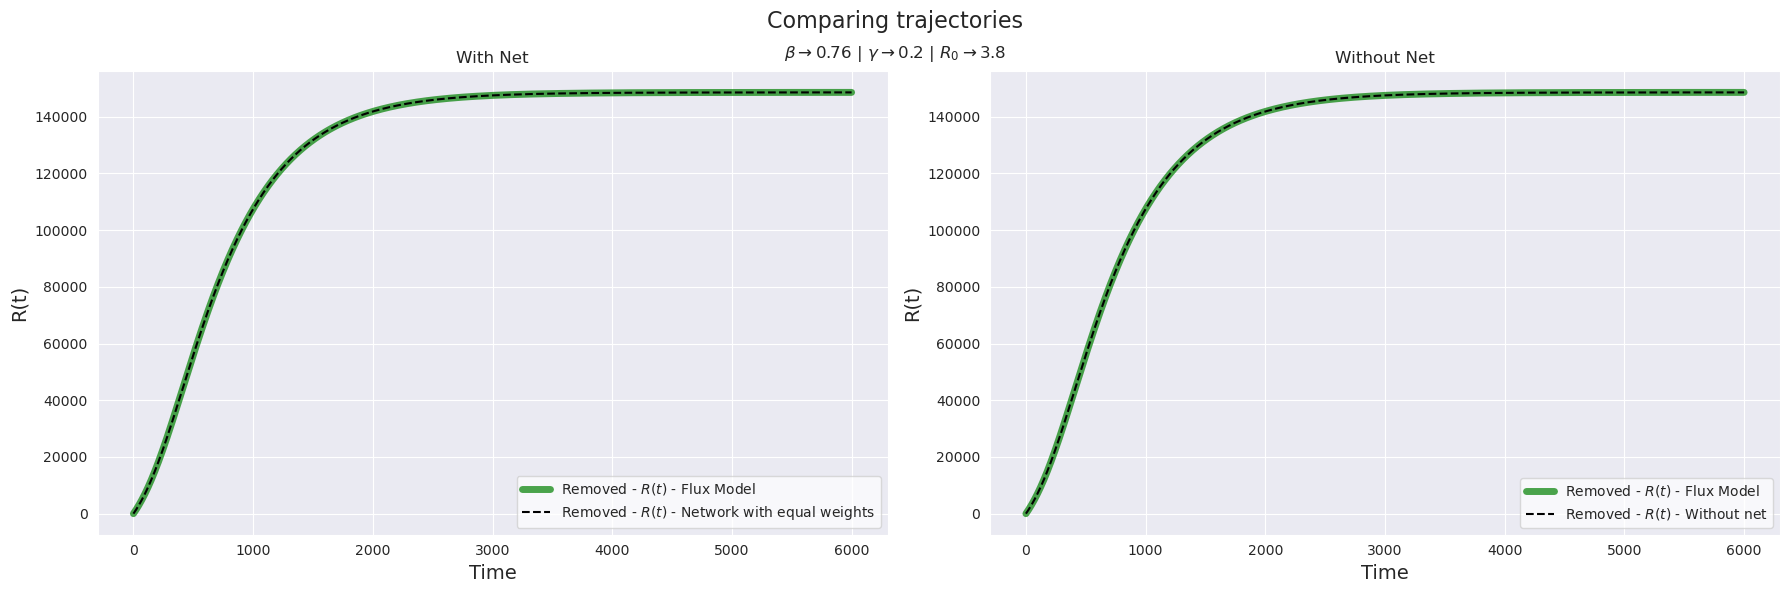

In [244]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Comparing trajectories', fontsize=16)
subtitle_text = r'$\beta$' + r'$\rightarrow$' + fr"{.76}" + ' | ' + r'$\gamma$' + r'$\rightarrow$' + fr'{.2}' + \
                ' | ' + r'$R_{0}$' + r'$\rightarrow$' + fr'{.76 / .2}'
fig.text(0.5, 0.90, subtitle_text, ha='center', fontsize=12)

ax1 = axs[0]
ax1.plot(df_baidu_data['R'], 'green', lw=5, alpha=0.7, label=r"Removed - $R(t)$ - Flux Model")
ax1.plot(df_with_net['R'], 'black', markersize=1, alpha=1.0, linestyle='dashed', label=r"Removed - $R(t)$ - Network with equal weights")
ax1.set_title('With Net')
ax1.set_xlabel("Time", fontsize=14)
ax1.set_ylabel(r'R(t)', fontsize=14)
legend1 = ax1.legend()
legend1.get_frame().set_facecolor('white')
legend1.get_frame().set_alpha(0.7)

ax2 = axs[1]
ax2.plot(df_baidu_data['R'], 'green', lw=5, alpha=0.7, label=r"Removed - $R(t)$ - Flux Model")
ax2.plot(df_without_net['R'], 'black', markersize=1, alpha=1.0, linestyle='dashed', label=r"Removed - $R(t)$ - Without net")
ax2.set_title('Without Net')
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel(r'R(t)', fontsize=14)
legend2 = ax2.legend()
legend2.get_frame().set_facecolor('white')
legend2.get_frame().set_alpha(0.7)

plt.tight_layout()
fig.savefig('R_comparing_flux_with_without_net.pdf')
plt.show()

#### Metapopulation SIR Network (Baidu Mobility Data) X Ordinary SIR Model (single subpop - same initial conditions)

In [245]:
print(f'Frobenius norm: {mSIR.frobenius_norm(matriz_agregada_china, matriz_ordinaria)}')

Frobenius norm: 2.087641104940456e-08


#### Metapopulation SIR Network (Baidu Mobility Data) X Metapopulation SIR Network with equal weights (same initial conditions)

In [246]:
print(f'Frobenius norm: {mSIR.frobenius_norm(matriz_agregada_china, matriz_agregada)}')

Frobenius norm: 1.8532120493440177e-08
